# Imports

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score, f1_score, roc_auc_score
import joblib

In [2]:
df = pd.read_csv('../../data/new_data/processed/Processed_Features_For_Traditional_ML_Techniques.csv', index_col=0)
df.head()

,NORP_percentage,GPE_percentage,PERSON_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,PERCENT_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,...,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,statement,tweet,target
ORG_percentage,,,,,,,,,,,,,,,,,,,,,
0.333333,0.166667,0.166667,0.166667,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,1,0,33,3,5,19,End of eviction moratorium means millions of A...,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,1.0
0.000000,0.250000,0.000000,0.750000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,14,0,2,34,End of eviction moratorium means millions of A...,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1.0
0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,3,0,4,10,End of eviction moratorium means millions of A...,THE SUPREME COURT is siding with super rich pr...,1.0
0.000000,0.333333,0.000000,0.166667,0.166667,0.333333,0.0,0.0,0.0,0.0,0.0,...,0,0,1,6,8,1,30,End of eviction moratorium means millions of A...,@POTUS Biden Blunders\n\nBroken campaign promi...,1.0
0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,1,0,11,3,2,19,End of eviction moratorium means millions of A...,@OhComfy I agree. The confluence of events rig...,1.0


In [3]:
df['target'] = df['target'].astype(int)


In [6]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
text_transformer_title = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english'))
])

text_transformer_text = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('text_title', text_transformer_title, 'statement'),
    ('text_text', text_transformer_text, 'tweet')
])

In [8]:
models = {
    "LogisticRegression": {
        'model': LogisticRegression(random_state=42),
        'params': {
            'clf__C': [0.1, 1, 10],
            'clf__solver': ['liblinear', 'lbfgs'],
            'clf__max_iter': [500, 1000],

        }
    },
    "RandomForest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [None, 10, 20],

        }
    },
    "XGBoost": {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'clf__n_estimators': [100, 200],
            'clf__learning_rate': [0.01, 0.1],
            'clf__max_depth': [3, 5, 7],
        }
    }
}


Training LogisticRegression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Classification Report for LogisticRegression :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13054
           1       1.00      1.00      1.00     13786

    accuracy                           1.00     26840
   macro avg       1.00      1.00      1.00     26840
weighted avg       1.00      1.00      1.00     26840



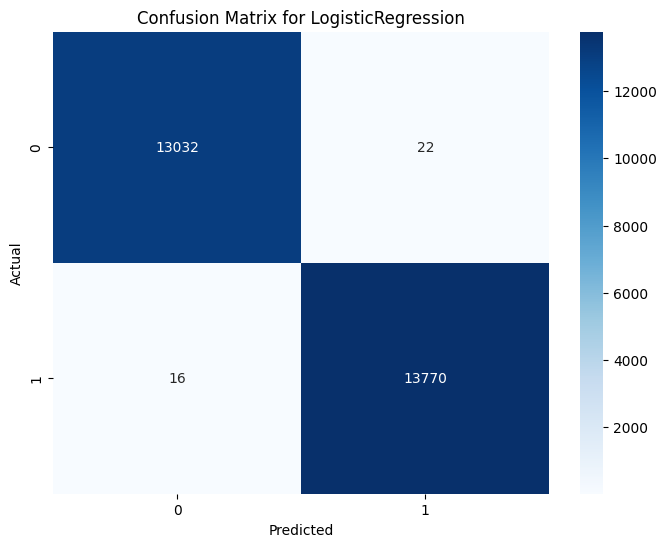

Accuracy for LogisticRegression: 0.9985842026825633
F1 Score for LogisticRegression: 0.9986220900717964
Training RandomForest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Classification Report for RandomForest :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13054
           1       1.00      1.00      1.00     13786

    accuracy                           1.00     26840
   macro avg       1.00      1.00      1.00     26840
weighted avg       1.00      1.00      1.00     26840



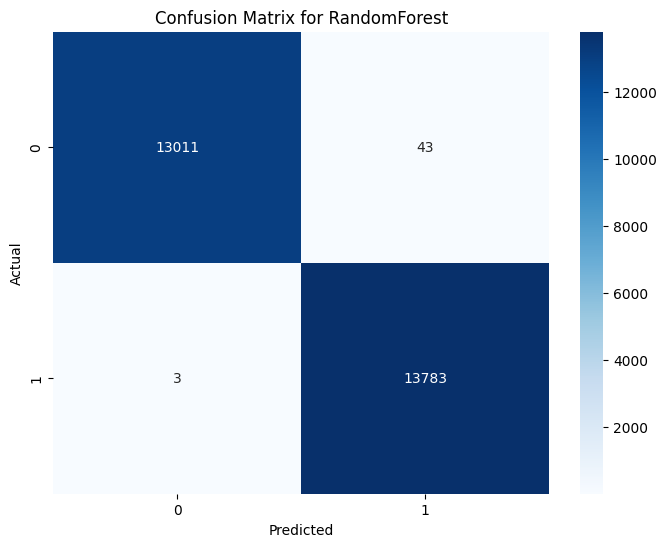

Accuracy for RandomForest: 0.9982861400894187
F1 Score for RandomForest: 0.9983340576560915
Training XGBoost...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\ignat\source\repos\Fake-News_Detector\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for XGBoost :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13054
           1       0.98      1.00      0.99     13786

    accuracy                           0.99     26840
   macro avg       0.99      0.99      0.99     26840
weighted avg       0.99      0.99      0.99     26840



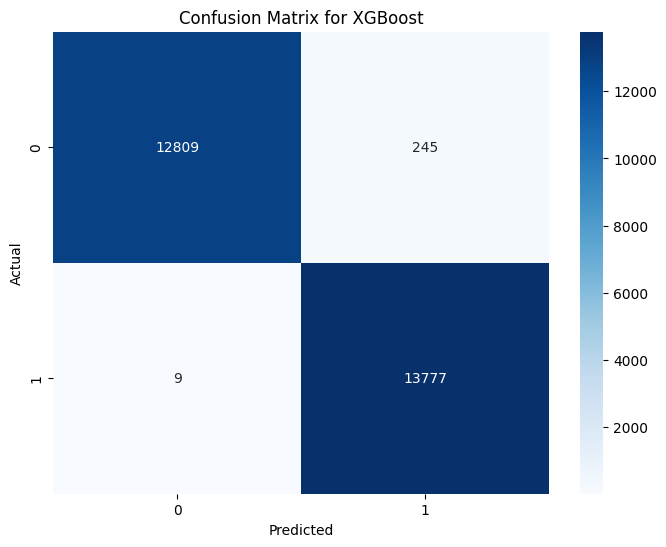

Accuracy for XGBoost: 0.9905365126676602
F1 Score for XGBoost: 0.9908659378596087


In [11]:
best_models = {}
results = {}

for name,config in models.items():
    print(f"Training {name}...")
    pipe = Pipeline([
        ('pre', preprocessor),
        ('clf', config['model'])
    ])

    grid = GridSearchCV(
        pipe,
        config['params'],
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_
    results[name] = {
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'test_score': grid.score(X_test, y_test)
    }

    y_pred = best_models[name].predict(X_test)
    print(f"\nClassification Report for {name} :")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred)}")
    print(f"F1 Score for {name}: {f1_score(y_test, y_pred)}")

## LR model has least amount of false-positives

In [16]:
lr_model = best_models["LogisticRegression"].named_steps['clf']

fitted_preprocessor = best_models["LogisticRegression"].named_steps['pre']

feature_importances = pd.DataFrame({
    'feature': fitted_preprocessor.get_feature_names_out(), 
    'importance': np.abs(lr_model.coef_[0])
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

feature_importances.head(20)

,feature,importance
165,text_title__biden,18.927422
684,text_title__patients,17.338005
694,text_title__percent,16.577255
944,text_title__twice,16.241692
788,text_title__reports,13.275804
959,text_title__vaccine,12.638733
980,text_title__voting,12.091548
148,text_title__bad,11.838036
696,text_title__perfectly,11.680733
605,text_title__mexico,11.193331


In [19]:
joblib.dump(best_models["LogisticRegression"], '../../artifact/new_lr_model.pkl')
print("Pomyślnie zapisano")

Pomyślnie zapisano
